# Data science and Business Analytics Intern

# Name - Aayushi

# Task 2 - Prediction using Unsupervised ML

 Prediction-- Predict the optimum number of clusters
and represent it visually. 


In [56]:
#importing the required libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Requiered dataset

In [57]:
#importing datasets
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
#check the shape of the data
print(data.shape)

(150, 6)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [45]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

In [47]:
#importing datavisualuization lib

import seaborn as sns

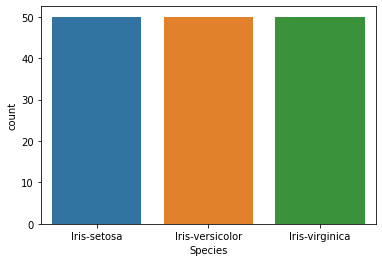

In [48]:
sns.countplot(data['Species'])

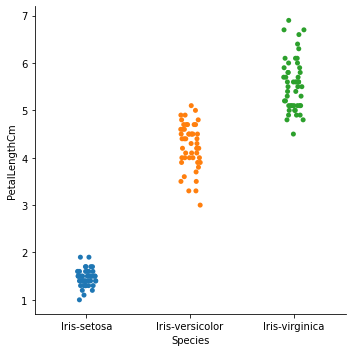

In [49]:
sns.catplot('Species' , 'PetalLengthCm' , data = data )

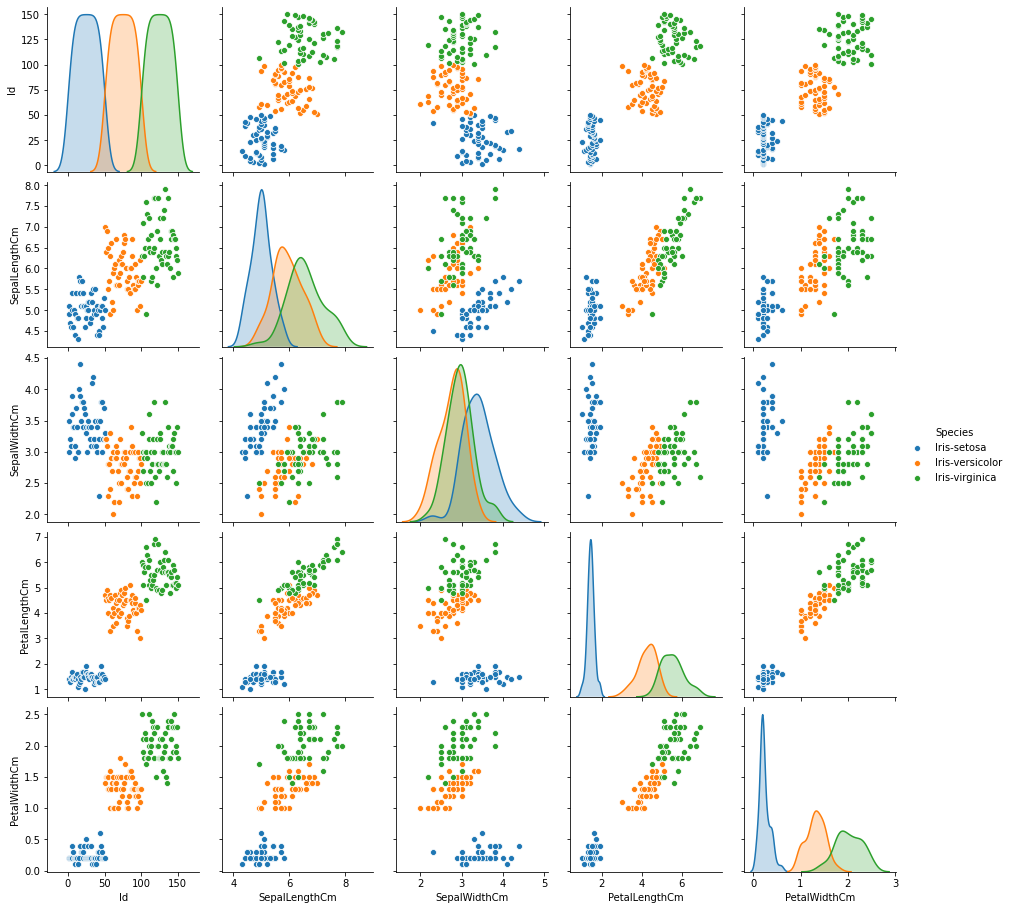

In [50]:
sns.pairplot(data , hue = 'Species')

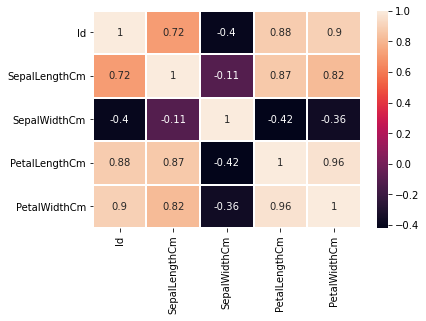

In [51]:
sns.heatmap(data.corr(), linewidths=1 , annot= True )

# Find the number of clusters for K-means?

In [52]:
from sklearn.cluster import KMeans
x = data.iloc[:,[0,1,2,3]].values

inner = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init= "k-means++", max_iter= 300 , n_init= 10 , random_state= 0)
    kmeans.fit(x)
    inner.append(kmeans.inertia_)

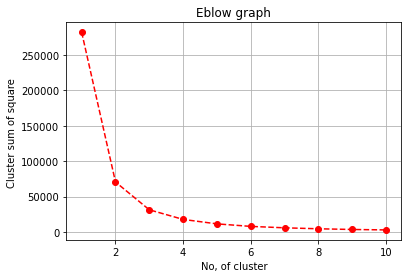

In [53]:
#Plot the result 
plt.plot(range(1,11),inner , 'go--' , color = 'red' )
plt.title("Eblow graph")
plt.xlabel("No, of cluster")
plt.ylabel("Cluster sum of square ")
plt.grid()
plt.show()

  From the above graph,we show the number of cluster is 3

# Apply kmeans on the datasets

In [54]:
kmeans = KMeans(n_clusters = 3 , init= "k-means++",max_iter=300 , n_init=10 , random_state=0 )
prediction = kmeans.fit_predict(x)

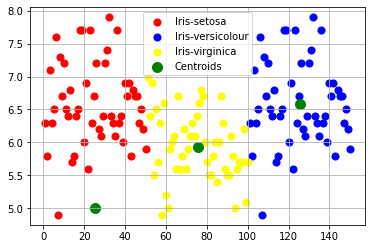

In [55]:
# Visualising the cluster 

plt.scatter(x[prediction == 0,0] , x[prediction ==1 ,1] , s= 50 , color = 'red' , label = 'Iris-setosa')
plt.scatter(x[prediction == 1,0] , x[prediction == 1 ,1] , s =50 , color = 'blue' , label = 'Iris-versicolour')
plt.scatter(x[prediction == 2,0] , x[prediction == 2,1] , s=50 , color = 'Yellow' , label = 'Iris-virginica' )

# Ploting the centroids of cluster
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s =100 , color ='green' , label = 'Centroids')
plt.legend()
plt.grid()